# Practicing number 1

MINE-4101: Applied Data Science  
Universidad de los Andes  
  
Dataset: Spotify 
By: Fabián Castellanos
  
Last update: August, 2022

In [7]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import csv
import re
from io import StringIO
import math

from pandas_profiling import ProfileReport

%matplotlib inline

In [8]:
# Sizing rows
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 30)

In [9]:
# Setting the expected number of columns
expected_column_num = 18

Loading data

In [10]:
# We are going to read a file with a better format. Record 1976 for Tyler the creator singer was changed from Tyler, The Creator to Tyler The Creator
spotify_df = pd.read_csv('Data_Taller_1.csv', sep=',', error_bad_lines=False, quoting=csv.QUOTE_NONE)
spotify_df.head()

b'Skipping line 3: expected 18 fields, saw 19\nSkipping line 4: expected 18 fields, saw 19\nSkipping line 5: expected 18 fields, saw 19\nSkipping line 7: expected 18 fields, saw 20\nSkipping line 9: expected 18 fields, saw 19\nSkipping line 10: expected 18 fields, saw 19\nSkipping line 15: expected 18 fields, saw 19\nSkipping line 16: expected 18 fields, saw 19\nSkipping line 17: expected 18 fields, saw 20\nSkipping line 22: expected 18 fields, saw 19\nSkipping line 23: expected 18 fields, saw 20\nSkipping line 26: expected 18 fields, saw 19\nSkipping line 28: expected 18 fields, saw 19\nSkipping line 29: expected 18 fields, saw 20\nSkipping line 30: expected 18 fields, saw 19\nSkipping line 32: expected 18 fields, saw 19\nSkipping line 33: expected 18 fields, saw 19\nSkipping line 37: expected 18 fields, saw 20\nSkipping line 38: expected 18 fields, saw 19\nSkipping line 40: expected 18 fields, saw 19\nSkipping line 41: expected 18 fields, saw 19\nSkipping line 42: expected 18 fields,

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre;
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000,77.0,0.751,0.834,1,-5.444,0,0.0437,0.30000,0.000018,0.3550,0.894,95.053,pop;
1,*NSYNC,Bye Bye Bye,200560.0,False,2000,NaN,0.614,0.928,8,-4.806,0,0.0516,0.04080,0.001040,0.0845,0.879,172.656,pop;
2,Eminem,The Real Slim Shady,284200.0,True,2000,86.0,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop;
3,Modjo,Lady - Hear Me Tonight,307153.0,False,2001,77.0,0.720,0.808,6,-5.627,1,0.0379,0.00793,0.029300,0.0634,0.869,126.041,Dance/Electronic;
4,Gigi D'Agostino,L'Amour Toujours,238759.0,False,2011,1.0,0.617,0.728,7,-7.932,1,0.0292,0.03280,0.048200,0.3600,0.808,139.066,pop;


We got a warning here, checking the file We got a issue about formating. For this reason we will save the file using Excel and saving on "Data_Taller_1_formato.csv" file. Like an aditional task, we fixed the record 1976 for Tyler the creator from *Tyler, The Creator* to *Tyler The Creator*

In [11]:
# Now its time to read the new file
spotify_df = pd.read_csv('Data_Taller_1_formato.csv', sep=';', quoting=csv.QUOTE_NONE)
spotify_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,Unnamed: 18
0,Britney Spears,Oops!...I Did It Again,211160.0,False,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,1.77e-05,0.3550,0.894,95.053,pop,NaN
1,blink-182,All The Small Things,167066.0,False,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.0,0.6120,0.684,148.726,"rock, pop",NaN
2,Faith Hill,Breathe,250546.0,False,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.0,0.2510,0.278,136.859,"pop, country",NaN
3,Bon Jovi,It's My Life,224493.0,False,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,1.35e-05,0.3470,0.544,119.992,"rock, metal",NaN
4,*NSYNC,Bye Bye Bye,200560.0,False,2000.0,NaN,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.00104,0.0845,0.879,172.656,pop,NaN


#Exploring the data

In [12]:
# Showing the number of rows and columns
row_count = spotify_df.shape[0]
column_count = spotify_df.shape[1]

print("Dataset has {} row(s) and {} column(s)".format(row_count, column_count))
if(column_count != expected_column_num):
  print("The number of columns on csv file is wrong")

Dataset has 2000 row(s) and 19 column(s)
The number of columns on csv file is wrong


In [13]:
# Showing the types we got the extra column name
spotify_df.dtypes

artist               object
song                 object
duration_ms         float64
explicit             object
year                float64
popularity          float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness     object
liveness            float64
valence             float64
tempo               float64
genre                object
Unnamed: 18         float64
dtype: object

In [14]:
# We are going to delete the extra column
del spotify_df["Unnamed: 18"]

We got three (3) columns like object types, it is time to get a look.

In [15]:
# Explicit column unique values
spotify_df["explicit"].value_counts()

False    1447
True      551
Name: explicit, dtype: int64

In [16]:
# Explicit column description
spotify_df["explicit"].describe()

count      1998
unique        2
top       False
freq       1447
Name: explicit, dtype: object

In [17]:
# Instrumentalness column unique values
spotify_df["instrumentalness"].value_counts()

0.0         1085
0.0013         3
0.000108       3
1.6e-06        3
0.000139       3
            ... 
0.00109        1
0.000409       1
9,00E-06       1
0.000166       1
0.00244        1
Name: instrumentalness, Length: 772, dtype: int64

We have a issue here, we got a couple of values with scientific notation on instrumentalness.

In [18]:
# Explicit column description
spotify_df["instrumentalness"].describe()

count     1998
unique     772
top        0.0
freq      1085
Name: instrumentalness, dtype: object

In [19]:
# Artist column unique values
spotify_df["artist"].value_counts()

Rihanna           25
Drake             23
Eminem            21
Calvin Harris     20
Britney Spears    19
                  ..
Sidney Samson      1
Cam’ron            1
Elvis Presley      1
Lucenzo            1
Blanco Brown       1
Name: artist, Length: 835, dtype: int64

In [20]:
# Explicit column description
spotify_df["artist"].describe()

count        2000
unique        835
top       Rihanna
freq           25
Name: artist, dtype: object

#Checking duplicates
To get better statistics on the file, we are going to check the data and delete duplicated records

In [21]:
spotify_dup_df = spotify_df[spotify_df.duplicated()]
spotify_dup_df.shape

duplicate_record_count = spotify_dup_df.shape[0]

#We could identify 59 duplicated records
if(duplicate_record_count > 0):
  print("We could identify {} duplicated record(s)".format(duplicate_record_count))

We could identify 59 duplicated record(s)


In [22]:
spotify_dup_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
161,Craig David,Fill Me In,257200.0,False,2000.0,60.0,0.682,0.744,8.0,-6.981,1.0,0.0365,0.37600,0.00951,0.0600,0.827,132.493,"hip hop, pop, R&B"
179,Destiny's Child,"Independent Women, Pt. 1",221133.0,False,2001.0,65.0,0.730,0.602,6.0,-3.782,0.0,0.2060,0.36200,3.69e-06,0.1690,0.927,97.954,"pop, R&B"
187,Gabrielle,Rise,219093.0,False,2001.0,60.0,0.558,0.481,8.0,-9.487,1.0,0.0260,0.31500,8.83e-06,0.0900,0.631,144.673,"pop, R&B"
215,Linkin Park,In the End,216880.0,False,2000.0,83.0,0.556,0.864,3.0,-5.870,0.0,0.0584,0.00958,0.0,0.2090,0.400,105.143,"rock, metal"
236,Kylie Minogue,Spinning Around,207866.0,False,2000.0,55.0,0.761,0.662,6.0,-7.645,0.0,0.0548,0.29200,6.19e-05,0.0956,0.631,120.043,"pop, Dance/Electronic"


#Cleaning the data

Removing duplicate records

In [23]:

new_spotify_df = spotify_df.drop_duplicates(subset=None, keep="first", inplace=False)
new_row_count = new_spotify_df.shape[0]
column_count = new_spotify_df.shape[1]

print("Dataset has {} row(s) and {} column(s)".format(new_row_count, column_count))


Dataset has 1941 row(s) and 18 column(s)


Fixing scientific notation

In [24]:
def fix_scientific_not(x):
  x = re.sub(',', '.', str(x))
  res = float(x)
  if(not math.isnan(res)):
    return res

new_spotify_df['instrumentalness'] = new_spotify_df['instrumentalness'].apply(fix_scientific_not)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [25]:
new_spotify_df.dtypes

artist               object
song                 object
duration_ms         float64
explicit             object
year                float64
popularity          float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

Fixing explicit column

In [26]:
def fix_yes_no(x):
  res = ""
  if 'TRUE' in str(x).upper(): 
    res = str(x).replace('True', 'Yes')
  elif 'FALSE' in str(x).upper(): 
    res = str(x).replace('False', 'No')
    
  return res

new_spotify_df['explicit'] = new_spotify_df['explicit'].apply(fix_yes_no)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [27]:
new_spotify_df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160.0,No,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066.0,No,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546.0,No,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493.0,No,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560.0,No,2000.0,NaN,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026.0,No,2019.0,79.0,0.842,0.734,1.0,-5.065,0.0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426.0,No,2019.0,78.0,0.552,0.702,9.0,-5.707,1.0,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593.0,No,2019.0,69.0,0.847,0.678,9.0,-8.635,1.0,0.1090,0.0669,0.000000,0.2740,0.811,NaN,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029.0,No,2019.0,75.0,0.741,0.520,8.0,-7.513,1.0,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [28]:
#Showing the types
new_spotify_df.dtypes

artist               object
song                 object
duration_ms         float64
explicit             object
year                float64
popularity          float64
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [29]:
#Unique values after cleaning
new_spotify_df["explicit"].value_counts()

No     1402
Yes     537
          2
Name: explicit, dtype: int64

In [30]:
#Cheking the unique values
new_spotify_df["genre"].value_counts()

pop                                      415
hip hop, pop                             267
hip hop, pop, R&B                        236
pop, Dance/Electronic                    216
pop, R&B                                 172
hip hop                                  121
hip hop, pop, Dance/Electronic            75
rock                                      56
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
set()                                     22
latin                                     15
hip hop, Dance/Electronic                 15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
metal                                      9
hip hop, pop, rock                         9
country   

In [31]:
# We have to remove set() value
def fix_genre(x):
  res = str(x)
  if 'SET()' in str(x).upper(): 
    res = ""
    
  return res

new_spotify_df['genre'] = new_spotify_df['genre'].apply(fix_genre)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [32]:
new_spotify_df["genre"].value_counts()

pop                                      415
hip hop, pop                             267
hip hop, pop, R&B                        236
pop, Dance/Electronic                    216
pop, R&B                                 172
hip hop                                  121
hip hop, pop, Dance/Electronic            75
rock                                      56
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
                                          22
hip hop, Dance/Electronic                 15
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
hip hop, pop, rock                         9
metal                                      9
country   

# Display top 10 singers last 10 years

We could get the result using max date on data, filter last ten years and order by count

In [33]:
#Maximum year on data
max_year = new_spotify_df["year"].max()
from_year = new_spotify_df["year"].max() - 10

#Filter data by last ten years
last_years_df = new_spotify_df.loc[new_spotify_df['year'] >= from_year]
#Grouping data
last_years_df = last_years_df["artist"].value_counts()
#Showing on screen
last_years_df.head(10)

Drake            22
David Guetta     18
Calvin Harris    18
Taylor Swift     14
Katy Perry       13
Ariana Grande    13
Maroon 5         11
Rihanna          11
Jason Derulo     11
Bruno Mars       10
Name: artist, dtype: int64

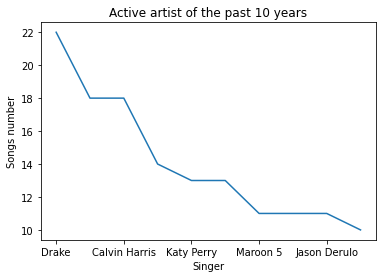

In [34]:
# Ploting the result
last_years_df.head(10).plot(title="Active artist of the past 10 years", xlabel="Singer", ylabel="Songs number")

# Latin and Folk/Acoustic differences and duration

In [35]:
# New column about duration on minutes (Transformation)
new_spotify_df["duration_min"] = new_spotify_df["duration_ms"] / 60000
new_spotify_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min
0,Britney Spears,Oops!...I Did It Again,211160.0,No,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3.519333
1,blink-182,All The Small Things,167066.0,No,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",2.784433
2,Faith Hill,Breathe,250546.0,No,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",4.175767
3,Bon Jovi,It's My Life,224493.0,No,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3.741550
4,*NSYNC,Bye Bye Bye,200560.0,No,2000.0,NaN,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3.342667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026.0,No,2019.0,79.0,0.842,0.734,1.0,-5.065,0.0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,3.017100
1996,Taylor Swift,Cruel Summer,178426.0,No,2019.0,78.0,0.552,0.702,9.0,-5.707,1.0,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,2.973767
1997,Blanco Brown,The Git Up,200593.0,No,2019.0,69.0,0.847,0.678,9.0,-8.635,1.0,0.1090,0.0669,0.000000,0.2740,0.811,NaN,"hip hop, country",3.343217
1998,Sam Smith,Dancing With A Stranger (with Normani),171029.0,No,2019.0,75.0,0.741,0.520,8.0,-7.513,1.0,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,2.850483


In [36]:
last_years_df = new_spotify_df.loc[new_spotify_df['year'] >= from_year]

#Pop al Folk/Acoustic comparison

It is important to check the unique values of gener

In [37]:
new_spotify_df["genre"].value_counts()

pop                                      415
hip hop, pop                             267
hip hop, pop, R&B                        236
pop, Dance/Electronic                    216
pop, R&B                                 172
hip hop                                  121
hip hop, pop, Dance/Electronic            75
rock                                      56
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
                                          22
hip hop, Dance/Electronic                 15
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
hip hop, pop, rock                         9
metal                                      9
country   

In [38]:
#Aggregate the Gener for Pop al Folk/Acoustic

def is_pop_folk(row):
  res = ""
  try:
    has_pop = str(row['genre']).index("pop")
    if has_pop > 0:
      res = "Pop"
  except:
    pass

  try:
    has_folk = str(row['genre']).index("Folk/Acoustic")
    if has_pop > 0:
      res = "Folk/Acoustic"    
  except:
    pass
  
  return res
        

new_spotify_df['pop_folk'] = new_spotify_df.apply(is_pop_folk, axis = 1)
new_spotify_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,pop_folk
0,Britney Spears,Oops!...I Did It Again,211160.0,No,2000.0,77.0,0.751,0.834,1.0,-5.444,0.0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop,3.519333,
1,blink-182,All The Small Things,167066.0,No,1999.0,79.0,0.434,0.897,0.0,-4.918,1.0,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop",2.784433,Pop
2,Faith Hill,Breathe,250546.0,No,1999.0,66.0,0.529,0.496,7.0,-9.007,1.0,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country",4.175767,
3,Bon Jovi,It's My Life,224493.0,No,2000.0,78.0,0.551,0.913,0.0,-4.063,0.0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal",3.741550,
4,*NSYNC,Bye Bye Bye,200560.0,No,2000.0,NaN,0.614,0.928,8.0,-4.806,0.0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop,3.342667,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026.0,No,2019.0,79.0,0.842,0.734,1.0,-5.065,0.0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop,3.017100,
1996,Taylor Swift,Cruel Summer,178426.0,No,2019.0,78.0,0.552,0.702,9.0,-5.707,1.0,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop,2.973767,
1997,Blanco Brown,The Git Up,200593.0,No,2019.0,69.0,0.847,0.678,9.0,-8.635,1.0,0.1090,0.0669,0.000000,0.2740,0.811,NaN,"hip hop, country",3.343217,
1998,Sam Smith,Dancing With A Stranger (with Normani),171029.0,No,2019.0,75.0,0.741,0.520,8.0,-7.513,1.0,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop,2.850483,


In [39]:
#Calculate the mean for both of them
folk_new_spotify = new_spotify_df.loc[new_spotify_df['genre'].str.contains('pop', na=False)]
folk_new_spotify_mean = folk_new_spotify["duration_min"].mean()

pop_new_spotify = new_spotify_df.loc[new_spotify_df['genre'].str.contains('Folk/Acoustic', na=False)]
pop_new_spotify_mean = pop_new_spotify["duration_min"].mean()
diff = folk_new_spotify_mean - pop_new_spotify_mean

print("The mean difference between Pop and Folk/Acoustic is {}".format(diff)) 

The mean difference between Pop and Folk/Acoustic is 0.1381695780590717


Text(0.5, 0, 'Gener')

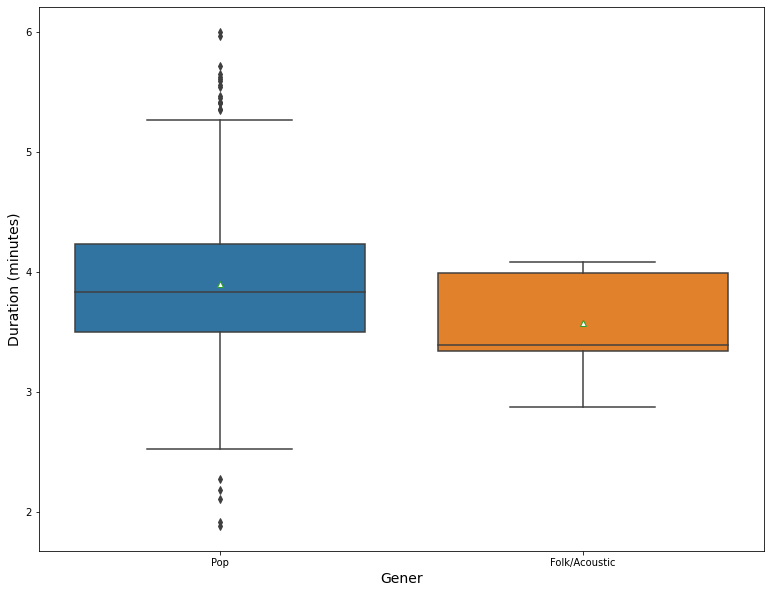

In [40]:
plt.figure(figsize = (13, 10))
sns.boxplot(x = 'pop_folk', y = 'duration_min', data = new_spotify_df.loc[new_spotify_df["pop_folk"].isin(["Pop", "Folk/Acoustic"])], showmeans=True, meanprops={"markerfacecolor": "white"})
plt.ylabel("Duration (minutes)", size=14)
plt.xlabel("Gener", size=14)

#Top 5 on 2019

Filtering data on 2019

In [41]:
new_spotify_2009_df = new_spotify_df.loc[new_spotify_df['year'] == 2019]
new_spotify_2009_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,pop_folk
194,K-Ci & JoJo,Crazy,262773.0,No,2019.0,30.0,0.680,0.644,0.0,-4.507,1.0,0.0258,0.08400,0.000000,0.5490,0.484,116.097,"pop, R&B",4.379550,
214,Angie Martinez,If I Could Go! (feat. Lil' Mo & Sacario),244466.0,No,2019.0,40.0,0.583,0.643,9.0,-7.486,0.0,0.3550,0.17100,0.000000,0.0395,0.700,195.685,pop,4.074433,
217,Aaliyah,Rock The Boat,275026.0,No,2019.0,0.0,0.641,0.720,5.0,-5.209,1.0,0.0336,0.06880,0.002860,0.1930,0.418,92.988,"hip hop, pop, R&B",4.583767,Pop
244,Liberty X,Just A Little,237359.0,No,2019.0,43.0,0.786,0.614,5.0,-6.554,0.0,0.0574,0.00616,0.000000,0.0490,0.742,103.887,pop,3.955983,
333,Lil' Kim,Magic Stick,359973.0,Yes,2019.0,47.0,0.849,0.498,2.0,-7.872,1.0,0.2720,0.11600,0.000045,0.2680,0.502,92.980,"hip hop, pop, R&B",5.999550,Pop


In [42]:
#Getting the unique values
new_spotify_2009_df["genre"].value_counts()
new_spotify_2009_df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,pop_folk
194,K-Ci & JoJo,Crazy,262773.0,No,2019.0,30.0,0.680,0.644,0.0,-4.507,1.0,0.0258,0.084000,0.000000,0.5490,0.484,116.097,"pop, R&B",4.379550,
214,Angie Martinez,If I Could Go! (feat. Lil' Mo & Sacario),244466.0,No,2019.0,40.0,0.583,0.643,9.0,-7.486,0.0,0.3550,0.171000,0.000000,0.0395,0.700,195.685,pop,4.074433,
217,Aaliyah,Rock The Boat,275026.0,No,2019.0,0.0,0.641,0.720,5.0,-5.209,1.0,0.0336,0.068800,0.002860,0.1930,0.418,92.988,"hip hop, pop, R&B",4.583767,Pop
244,Liberty X,Just A Little,237359.0,No,2019.0,43.0,0.786,0.614,5.0,-6.554,0.0,0.0574,0.006160,0.000000,0.0490,0.742,103.887,pop,3.955983,
333,Lil' Kim,Magic Stick,359973.0,Yes,2019.0,47.0,0.849,0.498,2.0,-7.872,1.0,0.2720,0.116000,0.000045,0.2680,0.502,92.980,"hip hop, pop, R&B",5.999550,Pop
674,Hinder,Lips Of An Angel,261053.0,No,2019.0,35.0,0.474,0.744,2.0,-5.386,1.0,0.0341,0.020800,0.000001,0.2090,0.238,129.005,"pop, rock, metal",4.350883,
771,Hinder,Better Than Me,223533.0,No,2019.0,30.0,0.451,0.682,2.0,-5.295,0.0,0.0290,0.205000,0.000000,0.1750,0.254,139.913,"pop, rock, metal",3.725550,
1159,Chris Brown,Beautiful People,225881.0,No,2019.0,53.0,0.415,0.775,5.0,-6.366,0.0,0.1610,0.065800,0.004310,0.0843,0.536,127.898,"hip hop, pop, R&B",3.764683,Pop
1779,Hayden James,NUMB,217296.0,Yes,2019.0,47.0,0.617,0.558,10.0,-7.046,0.0,0.0431,0.184000,0.000001,0.0911,0.400,147.932,"pop, Dance/Electronic",3.621600,
1827,Nicky Jam,X,172854.0,No,2019.0,74.0,0.594,0.749,9.0,-5.298,0.0,0.0560,0.033800,0.001060,0.3000,0.694,179.968,latin,2.880900,


In [43]:
#Counting the genders by songs and grouping data to get the top 5
genre_2019 = ",".join(new_spotify_2009_df["genre"]).replace(", ", ",")
genre_2019 = re.sub("^\s+|\s+$", "", genre_2019, flags=re.UNICODE)
genre_2019 = genre_2019.split(",")
genre_2019
genre_2019_np = np.array(genre_2019)
genre_2019_df = pd.DataFrame(genre_2019_np, columns = ['Gener'])

genre_2019_top_df = genre_2019_df.value_counts(sort=True, ascending=False)
genre_2019_top_df.head(5)

Gener           
pop                 63
hip hop             38
Dance/Electronic    21
R&B                  9
latin                8
dtype: int64

The second part is so different, we are able to calculate 2000, 2010, 2015, and 2019. We are going to check the categories.

In [44]:
#Checking de values for Genre
new_spotify_df["genre"].value_counts()

pop                                      415
hip hop, pop                             267
hip hop, pop, R&B                        236
pop, Dance/Electronic                    216
pop, R&B                                 172
hip hop                                  121
hip hop, pop, Dance/Electronic            75
rock                                      56
Dance/Electronic                          41
rock, pop                                 39
rock, metal                               36
pop, latin                                28
pop, rock                                 26
                                          22
hip hop, Dance/Electronic                 15
latin                                     15
pop, rock, metal                          14
hip hop, pop, latin                       14
R&B                                       13
pop, rock, Dance/Electronic               12
hip hop, pop, rock                         9
metal                                      9
country   

In [45]:
#Transforming the data
genre_all = ",".join(new_spotify_df["genre"]).replace(", ", ",")
genre_all = re.sub("^\s+|\s+$", "", genre_all, flags=re.UNICODE)
genre_all = genre_all.split(",")
genre_all_np = np.array(genre_all)
genre_all_np

#We got here all the values
genre_all_df = pd.DataFrame(genre_all_np, columns=["Gender"])
#Unique values
genre_all_ser = genre_all_df.value_counts(sort=True, ascending=False)

#This is not the best practice, but I got the indexes
genre_all_idx = np.array(str(genre_all_ser.index.values.tolist()).replace("), ", "|").replace("[","").replace("]","").replace("(","").replace(")","").replace(",","").replace("'","").replace("|",",").split(","))
cat_num = len(genre_all_idx)
genre_all_df2 = pd.DataFrame({'Gener': genre_all_idx, '2000': np.zeros(cat_num), '2005': np.zeros(cat_num), '2010': np.zeros(cat_num), '2015': np.zeros(cat_num), '2019': np.zeros(cat_num), '2019': np.zeros(cat_num)})
genre_all_df2



,Gener,2000,2005,2010,2015,2019
0,pop,0.0,0.0,0.0,0.0,0.0
1,hip hop,0.0,0.0,0.0,0.0,0.0
2,R&B,0.0,0.0,0.0,0.0,0.0
3,Dance/Electronic,0.0,0.0,0.0,0.0,0.0
4,rock,0.0,0.0,0.0,0.0,0.0
5,metal,0.0,0.0,0.0,0.0,0.0
6,latin,0.0,0.0,0.0,0.0,0.0
7,,0.0,0.0,0.0,0.0,0.0
8,Folk/Acoustic,0.0,0.0,0.0,0.0,0.0
9,country,0.0,0.0,0.0,0.0,0.0


In [46]:
#It is time to calculate the averages
def count_genre_2000(x):
  count = new_spotify_df.loc[(new_spotify_df["genre"] == x) & (new_spotify_df["year"] == 2000)]["genre"].count()    
  return count
  
def count_genre_2005(x):
  count = new_spotify_df.loc[(new_spotify_df["genre"] == x) & (new_spotify_df["year"] == 2005)]["genre"].count()    
  return count

def count_genre_2010(x):
  count = new_spotify_df.loc[(new_spotify_df["genre"] == x) & (new_spotify_df["year"] == 2010)]["genre"].count()    
  return count  

def count_genre_2015(x):
  count = new_spotify_df.loc[(new_spotify_df["genre"] == x) & (new_spotify_df["year"] == 2015)]["genre"].count()    
  return count  

def count_genre_2019(x):
  count = new_spotify_df.loc[(new_spotify_df["genre"] == x) & (new_spotify_df["year"] == 2019)]["genre"].count()    
  return count  

genre_all_df2['2000'] = genre_all_df2['Gener'].apply( count_genre_2000 )

genre_all_df2['2005'] = genre_all_df2['Gener'].apply( count_genre_2005 )
genre_all_df2['2010'].value_counts(sort=True, ascending=False).head(5)
genre_all_df2['2010'] = genre_all_df2['Gener'].apply( count_genre_2010 )
genre_all_df2['2015'] = genre_all_df2['Gener'].apply( count_genre_2015 )
genre_all_df2['2019'] = genre_all_df2['Gener'].apply( count_genre_2019 )
genre_all_df2

,Gener,2000,2005,2010,2015,2019
0,pop,16,10,19,23,25
1,hip hop,4,8,3,1,13
2,R&B,3,0,1,1,0
3,Dance/Electronic,1,1,3,2,1
4,rock,1,6,0,3,0
5,metal,2,0,0,1,0
6,latin,0,0,0,0,6
7,,0,1,0,0,1
8,Folk/Acoustic,0,0,0,0,0
9,country,0,1,2,0,0


In [47]:
#Showing top 5 at the 2000 year
genre_all_df2.value_counts(sort=True, ascending=False).head(5)

Gener              2000  2005  2010  2015  2019
                   0     1     0     0     1       1
Dance/Electronic   1     1     3     2     1       1
Folk/Acoustic      0     0     0     0     0       1
R&B                3     0     1     1     0       1
World/Traditional  0     0     0     0     0       1
dtype: int64

In [48]:
#Showing top 5 at the 2005 year
genre_all_df2['2005'].value_counts(sort=True, ascending=False).head(5).reset_index()

,index,2005
0,0,10
1,1,3
2,10,1
3,8,1
4,6,1


In [49]:
#Showing top 5 at the 2010 year
genre_all_df2['2010'].value_counts(sort=True, ascending=False).head(5)

0     11
3      2
19     1
1      1
2      1
Name: 2010, dtype: int64

In [50]:
#Showing top 5 at the 2015 year
genre_all_df2['2015'].value_counts(sort=True, ascending=False).head(5)

0     10
1      3
23     1
2      1
3      1
Name: 2015, dtype: int64

In [51]:
#Showing top 5 at the 2019 year
genre_all_df2['2019'].value_counts(sort=True, ascending=False).head(5)

0     11
1      2
25     1
13     1
6      1
Name: 2019, dtype: int64

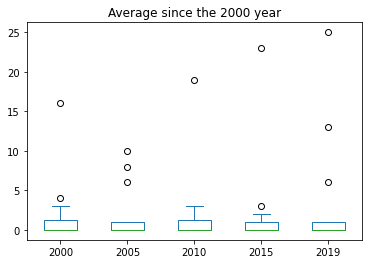

In [52]:
genre_all_df2.plot.box(title="Average since the 2000 year")

#New artist growing

In [53]:
new_spotify_df.groupby(['artist', 'year']).size()

artist         year  
"H ""two"" O"  2008.0    1
*NSYNC         2000.0    2
               2001.0    2
112            2001.0    2
2 Chainz       2013.0    1
                        ..
iann dior      2019.0    2
iio            2006.0    1
t.A.T.u.       2020.0    1
will.i.am      2007.0    1
               2013.0    3
Length: 1391, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


<Figure size 936x720 with 0 Axes>

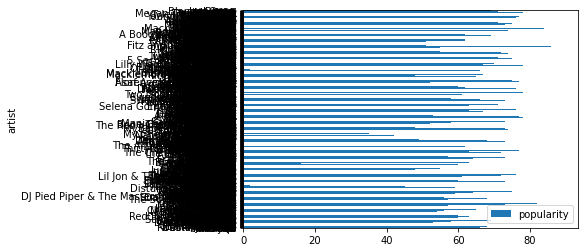

In [77]:
def is_new(artist, year):
  #print("Artist: {}".format(artist))
  #print("Year: {}".format(year))
  res = ""
  df = new_spotify_df.loc[new_spotify_df["artist"] == artist]
  
  min_year = df["year"].min()
  #print(min_year)
  #print("Artist: {}, Min Year: {}".format(artist, min_year))
  if(year == min_year):
    res = "Yes"

  return res

#new_spotify_df['new_singer'] = new_spotify_df["artist"].apply(is_new)
new_spotify_df['new_singer'] = new_spotify_df.apply(lambda x: is_new(x.artist, x.year), axis=1)
new_artist_df = new_spotify_df.loc[new_spotify_df['new_singer'] == "Yes"]

plt.figure(figsize = (13, 10))
#sns.boxplot(x = 'artist', y = 'popularity', data = new_artist_df)
new_artist_df.plot(x="artist", y="popularity", kind = 'barh')

#new_spotify_df.loc[new_spotify_df['new_singer'] == "Yes"]["artist"].plot()
#new_spotify_df['new_singer'] = new_spotify_df['new_singer'].apply(is_new)
#new_spotify_df

In [65]:
new_spotify_df.loc[new_spotify_df['artist'] == "Kesha"]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,duration_min,pop_folk,new_singer
1004,Kesha,TiK ToK,199693.0,No,2010.0,80.0,0.755,0.837,2.0,-2.718,0.0,0.1420,0.099100,0.000000,0.2890,0.714,120.028,"pop, Dance/Electronic",3.328217,,Yes
1009,Kesha,Take It Off,215200.0,No,2010.0,68.0,0.729,0.675,5.0,-5.292,0.0,0.0286,0.000041,0.001260,0.0867,0.740,125.036,"pop, Dance/Electronic",3.586667,,Yes
1059,Kesha,Blah Blah Blah (feat. 3OH!3),172053.0,Yes,2010.0,61.0,0.752,0.836,10.0,-3.173,1.0,0.1150,0.084300,0.000425,0.4240,0.519,120.003,"pop, Dance/Electronic",2.867550,,Yes
1079,Kesha,Your Love Is My Drug,187133.0,No,2010.0,69.0,0.826,0.612,1.0,-3.891,1.0,0.0982,0.006810,0.000000,0.0889,0.756,120.057,"pop, Dance/Electronic",3.118883,,Yes
1110,Kesha,Blow,219973.0,No,2010.0,69.0,0.753,0.729,11.0,-3.862,0.0,0.0392,0.003340,0.000057,0.0730,0.812,120.013,"pop, Dance/Electronic",3.666217,,Yes
1148,Kesha,We R Who We R,204760.0,No,2010.0,71.0,0.736,0.817,8.0,-4.900,1.0,0.0407,0.009870,0.001670,0.1170,0.653,119.950,"pop, Dance/Electronic",3.412667,,Yes
1223,Kesha,Die Young,211920.0,No,2012.0,78.0,0.711,0.700,1.0,-4.805,0.0,0.0460,0.004980,0.000125,0.2150,0.801,128.001,"pop, Dance/Electronic",3.532000,,
1275,Kesha,C'Mon,214333.0,No,2012.0,0.0,0.558,0.781,1.0,-5.448,0.0,0.0963,0.006570,0.001440,0.1020,0.286,126.025,"pop, Dance/Electronic",3.572217,,
